<h2 align=center> Toxic Comments Classification using Standford's Glove Embeddings</h2>

### Import Packages and Functions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.3.0


### Load and Explore Data

In [2]:
# Load data
#/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
#/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
#/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
#/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip

train_df=pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip').fillna(' ')
test_df=pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip').fillna(' ')
train_df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
124259,98b3959ffea58166,fake licensing dude.,0,0,0,0,0,0
109276,4866d5a1494f3d7b,"""\n\n Error of preposition \n\nI have changed ...",0,0,0,0,0,0
74736,c7ee497c32b9f59c,ChillyMD - which curricula you have looked at ...,0,0,0,0,0,0
134106,cd352ee56f1980fd,===Thanks for your editing help on Boeing airc...,0,0,0,0,0,0
14516,2653802a68b09fa6,What is your problem? \n\nI am posting factual...,0,0,0,0,0,0
67856,b585008394bd8a2e,Contested deletion \n\nThis article should not...,0,0,0,0,0,0
70915,bdca232fa9604fa7,"""\nSupport- WP:PRECISION is policy, which enjo...",0,0,0,0,0,0
10676,1c37def76d043cc6,"""\n\n Very nice \n\n The Excellent Userpage A...",0,0,0,0,0,0
101886,212ce38b1bc035b1,No problem. It's too bad that some people can ...,0,0,0,0,0,0
235,00958dec64c33224,Please stop adding nonsense to Wikipedia. It i...,0,0,0,0,0,0


In [3]:
x=train_df['comment_text'].values
x

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [4]:
# View few toxic comments
train_df.loc[train_df['toxic']==1]


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
159494,fef4cf7ba0012866,"""\n\n our previous conversation \n\nyou fuckin...",1,0,1,0,1,1
159514,ff39a2895fc3b40e,YOU ARE A MISCHIEVIOUS PUBIC HAIR,1,0,0,0,1,0
159541,ffa33d3122b599d6,Your absurd edits \n\nYour absurd edits on gre...,1,0,1,0,1,0
159546,ffb47123b2d82762,"""\n\nHey listen don't you ever!!!! Delete my e...",1,0,0,0,1,0


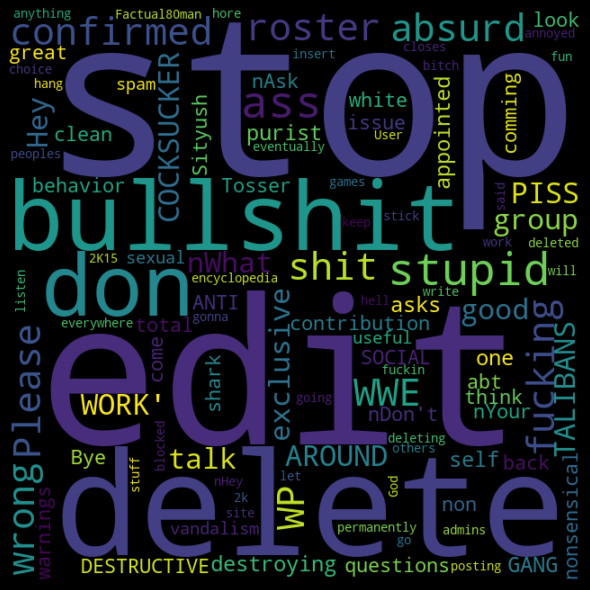

In [5]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = train_df['comment_text'].loc[train_df['toxic']==1].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

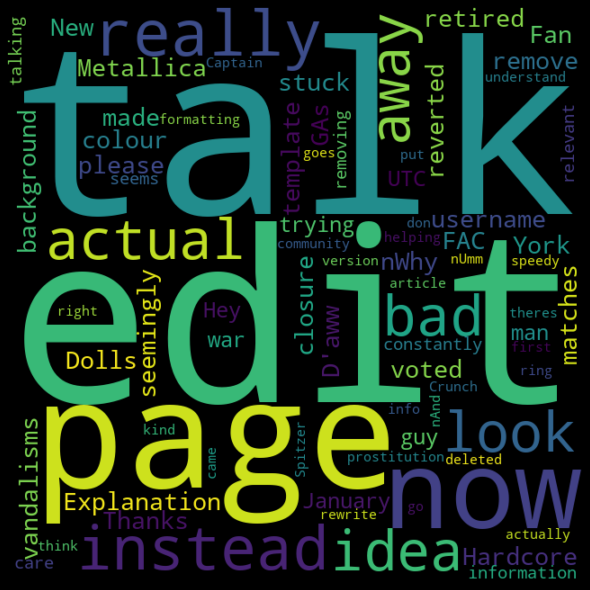

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comments = train_df['comment_text'].loc[train_df['toxic']==0].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [7]:
y=train_df['toxic'].values
y

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Distribution of Toxic Comments')

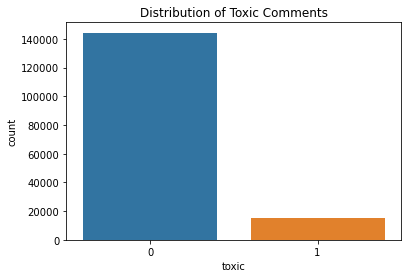

In [8]:
# Plot frequency of toxic comments

sns.countplot(x='toxic',data=train_df)
plt.title('Distribution of Toxic Comments')


In [9]:
train_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

### Data Prep — Tokenize and Pad Text Data

In [10]:
max_features=20000
max_text_length=400


In [11]:
x_tokenizer=text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized=x_tokenizer.texts_to_sequences(x)
x_train_val=sequence.pad_sequences(x_tokenized,maxlen=max_text_length)


### Prepare Embedding Matrix with Pre-trained GloVe Embeddings

The pretrained weights can be downloaded from the link given below by uncommenting the lines.
However we can used the one present in Kaggle.

In [12]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q ./glove.6B.zip.1

In [13]:
embedding_dim=100
embedding_index=dict()
f=open('../input/glove6b100dtxt/glove.6B.100d.txt')
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float32') 
    embedding_index[word]=coefs
    
f.close()
print(f'Found {len(embedding_index)} word vectors')

Found 400000 word vectors


In [14]:
embedding_matrix=np.zeros((max_features,embedding_dim))
for word,index in x_tokenizer.word_index.items():
    if index>max_features-1:
        break
    else:
        embedding_vector=embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index]=embedding_vector

### Create the embedding layer

In [15]:
model=Sequential()
model.add(Embedding(max_features,
                   embedding_dim,
                   embeddings_initializer=tf.keras.initializers.Constant(
                   embedding_matrix),
                   trainable=False))
model.add(Dropout(0.2))


### Build the Model

In [16]:
filters=250
kernel_size=3
hidden_dims=250


In [17]:
model.add(Conv1D(filters,
                kernel_size,
                padding='valid'))
model.add(MaxPooling1D())
model.add(Conv1D(filters,
                5,
                padding='valid',
                activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2000000   
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 250)         75250     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 250)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 250)         312750    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               6

In [18]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


### Train Model

In [19]:
x_train,x_val,y_train,y_val=train_test_split(x_train_val,y,test_size=0.2,random_state=1)

In [20]:
batch_size=32
epochs=3
model.fit(x_train,y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(x_val,y_val))


Epoch 1/3
3990/3990 [==============================] - 33s 8ms/step - loss: 0.1543 - accuracy: 0.9452 - val_loss: 0.1348 - val_accuracy: 0.9502
Epoch 2/3
3990/3990 [==============================] - 34s 8ms/step - loss: 0.1327 - accuracy: 0.9509 - val_loss: 0.1248 - val_accuracy: 0.9534
Epoch 3/3
3990/3990 [==============================] - 33s 8ms/step - loss: 0.1248 - accuracy: 0.9533 - val_loss: 0.1215 - val_accuracy: 0.9551


### Evaluate Model

In [21]:
test_df=pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [22]:
x_test=test_df['comment_text'].values

In [23]:
x_test_tokenized=x_tokenizer.texts_to_sequences(x_test)
x_testing=sequence.pad_sequences(x_test_tokenized,maxlen=max_text_length)


In [24]:
y_testing=model.predict(x_testing,verbose=1,batch_size=32)


4787/4787 [==============================] - 15s 3ms/step


In [25]:
y_testing.shape

(153164, 1)

In [26]:
y_testing[0]

array([0.9982881], dtype=float32)

In [27]:
test_df['Toxic']=['Not Toxic' if x<0.5 else 'Toxic' for x in y_testing]
test_df[['comment_text','Toxic']].head(20)

,comment_text,Toxic
0,Yo bitch Ja Rule is more succesful then you'll...,Toxic
1,== From RfC == \n\n The title is fine as it is...,Not Toxic
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",Not Toxic
3,":If you have a look back at the source, the in...",Not Toxic
4,I don't anonymously edit articles at all.,Not Toxic
5,Thank you for understanding. I think very high...,Not Toxic
6,Please do not add nonsense to Wikipedia. Such ...,Not Toxic
7,:Dear god this site is horrible.,Toxic
8,""" \n Only a fool can believe in such numbers. ...",Toxic
9,== Double Redirects == \n\n When fixing double...,Not Toxic


## Please do Upvote if you like the kernel .